# Amine Activation ML App

## Import all libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import pickle
import smogn

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR


## Import raw activation data

In [2]:
df = pd.read_csv(r'raw_data.csv')
df

,lot_0,acid_1,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,...,scale_dummy_21,yield_SK3,yield_UCHT1,yield_53_67,MFI_SK3,SK3_agg,MFI_UCHT1,UCHT1_agg,MFI_53_67,53_67_agg
0,NaN,1519,56.0,98.0,1.79,128.0,50,2000,200,200,...,0,NaN,50.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1519,56.0,98.0,1.79,128.0,50,2000,300,200,...,0,NaN,49.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1232,58.0,109.0,1.90,220.0,50,1700,250,200,...,0,NaN,38.0,34.0,NaN,NaN,161.0,NaN,128.0,NaN
3,NaN,1232,58.0,109.0,1.90,220.0,50,1700,300,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1232,58.0,109.0,1.90,220.0,50,1700,400,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,NaN,D2569,55.0,94.0,1.68,165.0,50,2000,800,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
119,NaN,D2577,52.0,94.0,1.75,186.0,50,2000,800,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
120,NaN,D2577,52.0,94.0,1.75,186.0,50,2000,650,200,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
121,NaN,D2555,57.0,100.0,1.77,196.0,3700,2000,400,200,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create sub-dataset with relevant columns

In [3]:
subdf = df.take([2,3,4,5,6,7,8,9,10,12,16,20,21],axis=1)
subdf

,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,time_10,temp_12,LS_16,time_dummy_20,scale_dummy_21
0,56.0,98.0,1.79,128.0,50,2000,200,200,1,20,88.0,0,0
1,56.0,98.0,1.79,128.0,50,2000,300,200,1,20,117.0,0,0
2,58.0,109.0,1.90,220.0,50,1700,250,200,1,20,146.0,0,0
3,58.0,109.0,1.90,220.0,50,1700,300,200,1,20,169.0,0,0
4,58.0,109.0,1.90,220.0,50,1700,400,200,1,20,186.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,55.0,94.0,1.68,165.0,50,2000,800,200,24,4,142.0,1,0
119,52.0,94.0,1.75,186.0,50,2000,800,200,24,4,141.0,1,0
120,52.0,94.0,1.75,186.0,50,2000,650,200,24,4,131.0,1,0
121,57.0,100.0,1.77,196.0,3700,2000,400,200,24,4,88.0,1,1


## Basic data analytics

In [4]:
subdf.corr()

,acid_mn_2,acid_mp_3,acid_pdi_4,acid_ls_5,scale_6,eda_7,edc_8,nhs_9,time_10,temp_12,LS_16,time_dummy_20,scale_dummy_21
acid_mn_2,1.000000,0.499244,0.062453,0.103998,0.032342,-0.139872,0.001497,-0.500059,-0.238021,0.435071,0.432793,-0.238021,0.062550
acid_mp_3,0.499244,1.000000,0.838264,0.630163,-0.087448,0.088020,-0.062321,-0.300402,-0.181217,0.229597,0.381777,-0.181217,-0.089763
acid_pdi_4,0.062453,0.838264,1.000000,0.644391,-0.155506,0.108875,-0.132481,-0.143638,-0.214865,0.167967,0.280201,-0.214865,-0.206579
acid_ls_5,0.103998,0.630163,0.644391,1.000000,-0.225736,0.090686,-0.061861,-0.350541,-0.101035,0.236762,0.458526,-0.101035,-0.307231
scale_6,0.032342,-0.087448,-0.155506,-0.225736,1.000000,-0.031823,0.003848,0.147566,0.333314,-0.268209,-0.240623,0.333314,0.807698
eda_7,-0.139872,0.088020,0.108875,0.090686,-0.031823,1.000000,0.368358,0.053781,-0.023128,-0.226820,0.154234,-0.023128,-0.039399
edc_8,0.001497,-0.062321,-0.132481,-0.061861,0.003848,0.368358,1.000000,0.029040,0.217234,-0.428671,0.330754,0.217234,0.015572
nhs_9,-0.500059,-0.300402,-0.143638,-0.350541,0.147566,0.053781,0.029040,1.000000,0.285971,-0.457284,-0.552979,0.285971,0.140904
time_10,-0.238021,-0.181217,-0.214865,-0.101035,0.333314,-0.023128,0.217234,0.285971,1.000000,-0.648346,-0.430142,1.000000,0.406506
temp_12,0.435071,0.229597,0.167967,0.236762,-0.268209,-0.226820,-0.428671,-0.457284,-0.648346,1.000000,0.555201,-0.648346,-0.296252


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 13 columns):
acid_mn_2         123 non-null float64
acid_mp_3         123 non-null float64
acid_pdi_4        123 non-null float64
acid_ls_5         123 non-null float64
scale_6           123 non-null int64
eda_7             123 non-null int64
edc_8             123 non-null int64
nhs_9             123 non-null int64
time_10           123 non-null int64
temp_12           123 non-null int64
LS_16             123 non-null float64
time_dummy_20     123 non-null int64
scale_dummy_21    123 non-null int64
dtypes: float64(5), int64(8)
memory usage: 12.6 KB
None


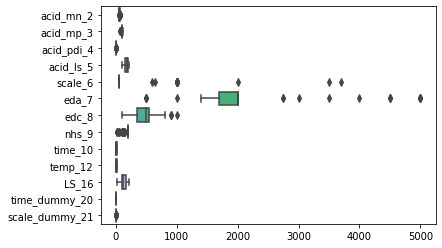

In [5]:
print(subdf.info())
seaborn.boxplot(data =subdf, orient = 'h')
plt.show()

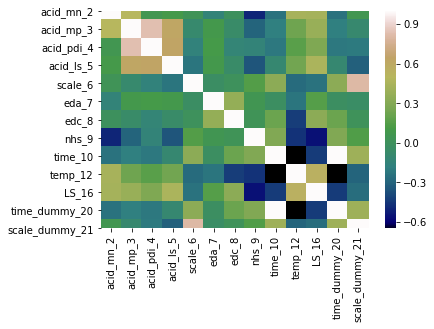

In [6]:
core_matrix = subdf.corr() 
seaborn.heatmap(core_matrix, cmap='gist_earth')
plt.show()

In [7]:
models = ['Linear Regression', 'XGBoost','SVM']
filenames = []
results=[]
scores = []
c = subdf.take([1,3,6,9,11,12],axis=1)

## Define function to evaluate model performance 

In [8]:
def regression_results(name, y_test, y_pred):
    explained_variance=metrics.explained_variance_score(y_test, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, y_pred) 
    mse=metrics.mean_squared_error(y_test, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_test, y_pred)
    r2=metrics.r2_score(y_test, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    return name, r2, np.sqrt(mse), mean_absolute_error

## Model 1: Simple linear regression

In [9]:
regr_params = [{'fit_intercept':[True, False],
              'normalize':[True, False],
              }]

m1 = GridSearchCV(LinearRegression(), param_grid=regr_params, n_jobs=-1, cv=5, verbose=5, scoring='neg_mean_squared_error')

X = np.array(subdf.take([1,3,6,9,11,12],axis=1))
y = np.ravel(subdf.take([10],axis=1))


X_train1, X_test, y_train1, y_test = train_test_split(X,y, test_size=0.2, random_state=4296)

## SMOTE algorithm to refine missing data

r_index: 100%|#####################################################################| 16/16 [00:00<00:00, 636.39it/s]


     acid_mp_3   acid_ls_5       edc_8    temp_12  time_dummy_20   scale_6  \
0   103.394125  190.937802  451.596089  19.992704       0.000000  0.000008   
1   107.996458  220.264242  502.996977  20.030457       0.000000  0.000000   
2   103.379374  190.810969  549.234774  20.011915       0.000000  0.001603   
3   103.379000  190.710000  500.000000  20.000000       0.000000  0.000000   
4   103.397573  190.965887  500.036413  19.907428       0.001434  0.000000   
..         ...         ...         ...        ...            ...       ...   
14  100.096348  197.033851  300.437845   4.163256       1.025593  0.003629   
15  108.749859  220.449671  298.442549   9.870208       0.004117  0.001834   
16   85.337646  141.675293  500.000000   4.000000       1.000000  0.000000   
17  100.042135  196.752282  104.620348   3.787803       0.992271  0.000000   
18   94.669211  114.673029  500.000000   4.000000       0.466921  1.000000   

         LS_16  
0   179.480090  
1   193.739600  
2   178.7729

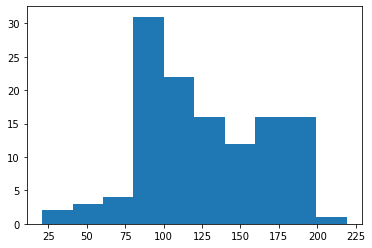

(98, 6) (118, 7)


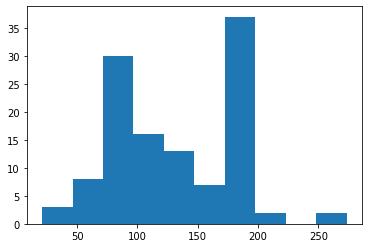

In [10]:

smote = pd.DataFrame(np.column_stack((X_train1,y_train1)), columns=['acid_mp_3','acid_ls_5','edc_8','temp_12','time_dummy_20','scale_6','LS_16'])
LS_smogn = smogn.smoter(
            data = smote,
            y = 'LS_16',
            k=9,
            samp_method='extreme',
            rel_thres = 0.8,        ## positive real number (0 < R < 1)
            rel_method = 'auto',      ## string ('auto' or 'manual')
            rel_xtrm_type = 'both', ## string ('low' or 'both' or 'high')
            rel_coef = 0.4)
print(LS_smogn)

plt.hist(subdf['LS_16'])
plt.show()
plt.hist(LS_smogn['LS_16'])

print(X_train1.shape,LS_smogn.shape)

In [11]:
y_train1 = LS_smogn[['LS_16']]
LS_smogn=LS_smogn.drop(['LS_16'],axis=1)

In [12]:
type(X_train1)

numpy.ndarray

In [13]:
train2 = np.array(LS_smogn)
type(train2)

numpy.ndarray

In [14]:

m1.fit(train2, y_train1)

y_pred_train = m1.predict(train2)
#y_pred = m1.predict(X_val)
y_pred_2 = m1.predict(X_test)

res0 = np.sqrt(mean_squared_error(y_pred_train, y_train1))
#res1 = np.sqrt(mean_squared_error(y_val, y_pred))
res2 = np.sqrt(mean_squared_error(y_test, y_pred_2))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.1s
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed:    7.2s remaining:    7.2s
[Parallel(n_jobs=-1)]: Done  15 out of  20 | elapsed:    7.2s remaining:    2.3s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    7.7s finished


In [15]:
print('RMSE TRAINING: %.6f' % res0)
#print('RMSE validation: %.6f' % res1)
print('RMSE testing: %.6f' % res2)

RMSE TRAINING: 23.160747
RMSE testing: 12.487576


(array([ 2.,  3.,  4., 31., 22., 16., 12., 16., 16.,  1.]),
 array([ 21. ,  40.8,  60.6,  80.4, 100.2, 120. , 139.8, 159.6, 179.4,
        199.2, 219. ]),
 <a list of 10 Patch objects>)

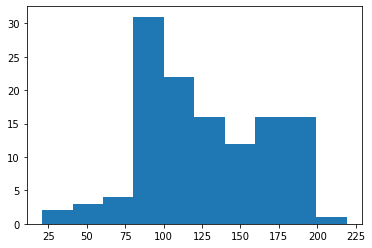

In [16]:
plt.hist(subdf.LS_16)

(array([1., 0., 3., 8., 4., 3., 2., 1., 1., 2.]),
 array([ 43. ,  57.3,  71.6,  85.9, 100.2, 114.5, 128.8, 143.1, 157.4,
        171.7, 186. ]),
 <a list of 10 Patch objects>)

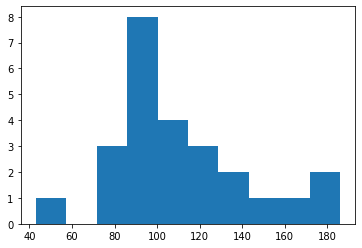

In [17]:
plt.hist(y_test)

(array([1., 3., 2., 7., 2., 3., 3., 2., 0., 2.]),
 array([ 52.39084079,  65.70152661,  79.01221244,  92.32289827,
        105.6335841 , 118.94426992, 132.25495575, 145.56564158,
        158.8763274 , 172.18701323, 185.49769906]),
 <a list of 10 Patch objects>)

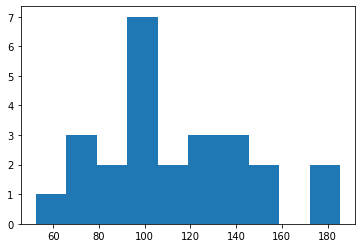

In [18]:
plt.hist(y_pred_2)

In [19]:
m1.best_estimator_

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [20]:
scores.append(regression_results(models[0],y_pred_2,y_test))

explained_variance:  0.8476
mean_squared_log_error:  0.0133
r2:  0.8431
MAE:  10.1694
MSE:  155.9395
RMSE:  12.4876


In [21]:
filenames.append('m1.sav')
pickle.dump(m1, open(filenames[0], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[0], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result0 = loaded_model.predict(new)
results.append(np.squeeze(result0))
print(new)
print('\n', np.squeeze(result0))

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 62.11198683  70.73289214  79.35379746  87.97470277  96.59560808
 105.2165134  113.83741871 122.45832402 131.07922933 139.70013465
 148.32103996 156.94194527 165.56285058]


## Model 2: XGBoost

{'max_depth': 1,
 'min_child_weight': 1,
 'eta': 0.3,
 'subsample': 0.9,
 'colsample_bytree': 0.8,
 'objective': 'reg:squarederror',
 'eval_metric': 'rmse',
 'validate_parameters': 1}

In [22]:
xgboost_params_all = [{
                    'learning_rate':np.arange(0.15, 0.31, 0.01),
                    'max_depth':[1],
                    'min_child_weight':[1],
                    'colsample_bytree':[0.8],
                    'subsample':[0.9],
                    'objective':['reg:squarederror'],
                    'eval_metric':['rmse'],
                    'eta':[0.3],
                    'validate_parameters':[1],
                    'n_estimators':np.arange(350,500,10),
                     }]
m2 = GridSearchCV(XGBRegressor(), param_grid=xgboost_params_all, n_jobs=-1, cv=5, verbose=2)

In [23]:
m2.fit(train2,y_train1)

#y_pred_3 = m2.predict(X_val)
y_pred_4 = m2.predict(X_test)

#res3 = np.sqrt(mean_squared_error(y_val, y_pred_3))
res4 = np.sqrt(mean_squared_error(y_test, y_pred_4))

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 193 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done 599 tasks      | elapsed:   10.1s
[Parallel(n_jobs=-1)]: Done 1165 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 1185 out of 1200 | elapsed:   17.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   17.3s finished


[14:45:03] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.0.0\src\learner.cc:328: 
Parameters: { importance_type, missing, n_estimators } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RMSE testing: 12.127225


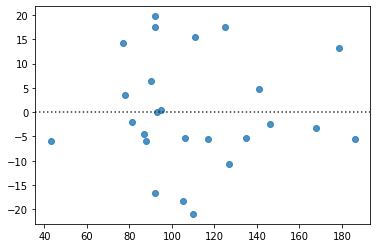

In [24]:
#print('RMSE validation: %.6f' % res3)
print('RMSE testing: %.6f' % res4)
#seaborn.residplot(y_val,y_pred_3)
plt.show()
seaborn.residplot(y_test,y_pred_4)

(array([1., 0., 5., 6., 5., 2., 3., 0., 1., 2.]),
 array([ 47.693375,  61.678917,  75.66446 ,  89.649994, 103.63554 ,
        117.62108 , 131.60661 , 145.59216 , 159.5777  , 173.56325 ,
        187.54878 ], dtype=float32),
 <a list of 10 Patch objects>)

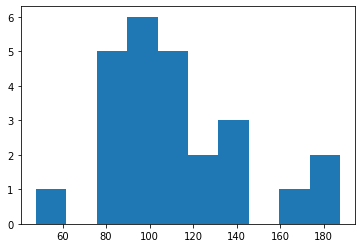

In [25]:
plt.hist(y_pred_4)

(array([1., 0., 3., 8., 4., 3., 2., 1., 1., 2.]),
 array([ 43. ,  57.3,  71.6,  85.9, 100.2, 114.5, 128.8, 143.1, 157.4,
        171.7, 186. ]),
 <a list of 10 Patch objects>)

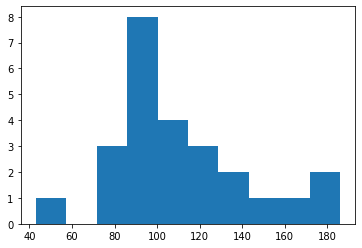

In [26]:
plt.hist(y_test)

In [27]:
scores.append(regression_results(models[1],np.abs(y_pred_4),y_test))

explained_variance:  0.8624
mean_squared_log_error:  0.0136
r2:  0.8526
MAE:  9.8373
MSE:  147.0696
RMSE:  12.1272


In [28]:
filenames.append('m2.sav')
pickle.dump(m2, open(filenames[1], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[1], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result1 = loaded_model.predict(new)
results.append(result1)
print(new)
print('\n', result1)

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 46.96663   60.239132  74.38354   87.52387   92.67169  103.55251
 102.506096 100.79171  103.17495  103.17495  101.89586  101.89586
 125.68131 ]


<BarContainer object of 6 artists>

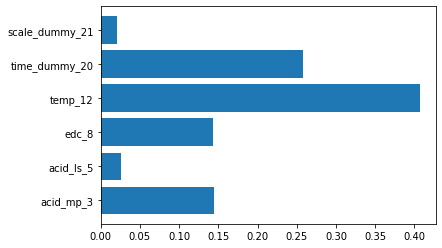

In [29]:
plt.barh(c.columns, m2.best_estimator_.feature_importances_)

## Model 3: Support Vector Machine

In [30]:
svm_params = [{'C': [5],
              'kernel': ["linear"],
            'cache_size': [200],
           'gamma': ['auto'],
           'degree':[x for x in range(1,5,1)],              
           }]
m3 = GridSearchCV(SVR(), param_grid=svm_params, n_jobs=-1, cv=5, verbose=2)

In [31]:
m3.fit(train2,y_train1)

#y_pred_5 = m3.predict(X_val)
y_pred_6 = m3.predict(X_test)

#res5 = np.sqrt(mean_squared_error(y_val, y_pred_5))
res6 = np.sqrt(mean_squared_error(y_test, y_pred_6))

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed:    5.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    6.5s finished
C:\Users\10273310\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


RMSE testing: 12.633868


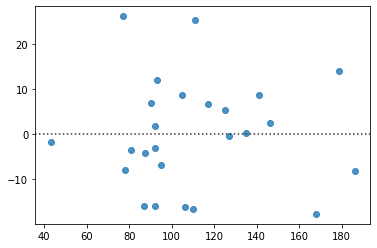

In [32]:
#print('RMSE validation: %.6f' % res5)
print('RMSE testing: %.6f' % res6)
#seaborn.residplot(y_val,y_pred_5)
plt.show()
seaborn.residplot(y_test,y_pred_6)

In [33]:
scores.append(regression_results(models[2],y_pred_6,y_test))

explained_variance:  0.8482
mean_squared_log_error:  0.0145
r2:  0.8428
MAE:  9.5962
MSE:  159.6146
RMSE:  12.6339


In [34]:
filenames.append('m3.sav')
pickle.dump(m3, open(filenames[2], 'wb'))
 
# load the model from disk
loaded_model = pickle.load(open(filenames[2], 'rb'))
new = np.array(pd.read_csv(r'test.csv'))
result2 = loaded_model.predict(new)
results.append(result2)
print(new)
print('\n', result2)

[[100 196 200   4   1   1]
 [100 196 250   4   1   1]
 [100 196 300   4   1   1]
 [100 196 350   4   1   1]
 [100 196 400   4   1   1]
 [100 196 450   4   1   1]
 [100 196 500   4   1   1]
 [100 196 550   4   1   1]
 [100 196 600   4   1   1]
 [100 196 650   4   1   1]
 [100 196 700   4   1   1]
 [100 196 750   4   1   1]
 [100 196 800   4   1   1]]

 [ 55.94678231  64.27413522  72.60148812  80.92884103  89.25619394
  97.58354684 105.91089974 114.23825265 122.56560556 130.89295846
 139.22031137 147.54766427 155.87501718]


In [44]:
scores

[('Linear Regression',
  0.8430951149466295,
  12.487575686263925,
  10.169439565447105),
 ('XGBoost', 0.8525816959074803, 12.127224676666403, 9.837325793457033),
 ('SVM', 0.8427882700410487, 12.633867612056358, 9.596165569793941)]

In [36]:
(scores[0][2]+scores[1][2]+scores[2][2])/3

12.416222658328897

In [37]:
results

[array([ 62.11198683,  70.73289214,  79.35379746,  87.97470277,
         96.59560808, 105.2165134 , 113.83741871, 122.45832402,
        131.07922933, 139.70013465, 148.32103996, 156.94194527,
        165.56285058]),
 array([ 46.96663 ,  60.239132,  74.38354 ,  87.52387 ,  92.67169 ,
        103.55251 , 102.506096, 100.79171 , 103.17495 , 103.17495 ,
        101.89586 , 101.89586 , 125.68131 ], dtype=float32),
 array([ 55.94678231,  64.27413522,  72.60148812,  80.92884103,
         89.25619394,  97.58354684, 105.91089974, 114.23825265,
        122.56560556, 130.89295846, 139.22031137, 147.54766427,
        155.87501718])]

In [38]:
test = pd.read_csv(r'test.csv')
ensemble = pd.DataFrame(data=results,columns = np.array(test.edc))

test

,mp,acid_ls,edc,temp,time,scale
0,100,196,200,4,1,1
1,100,196,250,4,1,1
2,100,196,300,4,1,1
3,100,196,350,4,1,1
4,100,196,400,4,1,1
5,100,196,450,4,1,1
6,100,196,500,4,1,1
7,100,196,550,4,1,1
8,100,196,600,4,1,1
9,100,196,650,4,1,1


In [39]:
ensemble.index=models
ensemble

,200,250,300,350,400,450,500,550,600,650,700,750,800
Linear Regression,62.111987,70.732892,79.353797,87.974703,96.595608,105.216513,113.837419,122.458324,131.079229,139.700135,148.321040,156.941945,165.562851
XGBoost,46.966629,60.239132,74.383537,87.523872,92.671692,103.552513,102.506096,100.791710,103.174950,103.174950,101.895859,101.895859,125.681313
SVM,55.946782,64.274135,72.601488,80.928841,89.256194,97.583547,105.910900,114.238253,122.565606,130.892958,139.220311,147.547664,155.875017


In [40]:
mean=ensemble.mean()
test = test.set_index('edc')
test['avg_prediction'] = mean
test

,mp,acid_ls,temp,time,scale,avg_prediction
edc,,,,,,
200,100,196,4,1,1,55.008466
250,100,196,4,1,1,65.082053
300,100,196,4,1,1,75.446274
350,100,196,4,1,1,85.475805
400,100,196,4,1,1,92.841165
450,100,196,4,1,1,102.117524
500,100,196,4,1,1,107.418138
550,100,196,4,1,1,112.496096
600,100,196,4,1,1,118.939928


Text(0, 0.5, 'Linker Score')

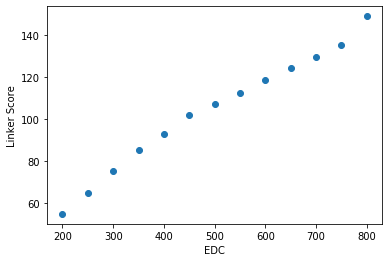

In [41]:
plt.scatter(test.index,test.avg_prediction)
plt.xlabel('EDC')
plt.ylabel('Linker Score')

In [42]:
res7 = np.sqrt(mean_squared_error(y_test,(np.squeeze(y_pred_2)+y_pred_4+y_pred_6)/3))
res7

11.24633566993719